We are going to work our black-capped chickadee song through this page
https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0
To see if the mel spectrogram is what we want

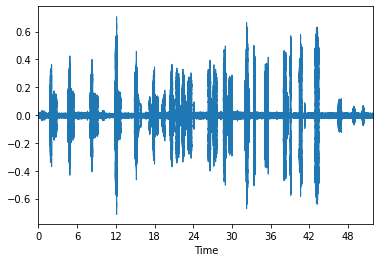

In [6]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

#directory = 'train_short_audio/bkcchi/'
file  = r'C:\Users\steve\git\birdclef21\audiosplitting\train_short_audio\bkcchi\XC121068.ogg'

#output_dir = directory + 'output/'


y, sample_rate = librosa.load(file, sr=None)

#Trim the silent edges from the file
sound_array, _ = librosa.effects.trim(y)

librosa.display.waveplot(sound_array, sr=sample_rate)

OK we got the waveform plotted for the call
Now let's do a FFT on the call

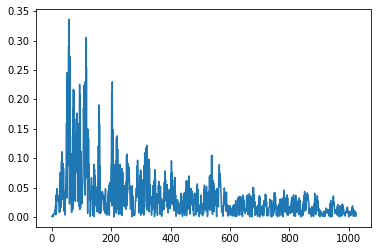

In [22]:
n_fft = 2048
D = np.abs(librosa.stft(sound_array[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D)

let's do the fft spectrum over time

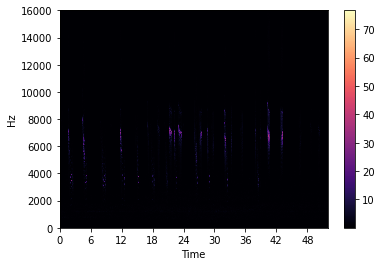

In [26]:
hop_length = 512
D = np.abs(librosa.stft(sound_array, n_fft=n_fft, hop_length=hop_length ))
librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='linear')
plt.colorbar()


Now let's change from amplitude to decibels (basically log scale of amplitude

C:\Users\steve\Anaconda3\envs\ddapp\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\steve\Anaconda3\envs\ddapp\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\steve\Anaconda3\envs\ddapp\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


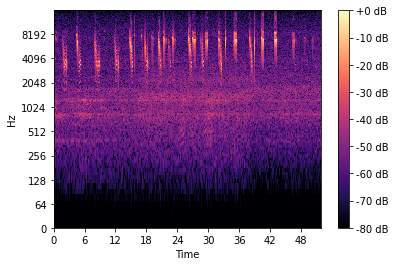

In [12]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

I am not as pleased with the diagram above - it really amplifies all the noise. We basically only want the spectrogram > -25 db

On to the mel scale

n_mels = 128
mel = librosa.filters.mel(sr=sample_rate, n_fft=n_fft, n_mels=n_mels)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
librosa.display.specshow(mel, sr=sample_rate, hop_length=hop_length, x_axis='linear')
plt.ylabel('Mel filter')
plt.colorbar()
plt.title('1. Our filter bank for converting from Hz to mels.')

plt.subplot(1, 3, 2)
mel_10 = librosa.filters.mel(sr=sample_rate, n_fft=n_fft, n_mels=10)
librosa.display.specshow(mel_10, sr=sample_rate, hop_length=hop_length, x_axis='linear')
plt.ylabel('Mel filter')
plt.colorbar()
plt.title('2. Easier to see what is happening with only 10 mels.')

plt.subplot(1, 3, 3)
idxs_to_plot = [0, 9, 49, 99, 127]
for i in idxs_to_plot:
    plt.plot(mel[i])
plt.legend(labels=[f'{i+1}' for i in idxs_to_plot])
plt.title('3. Plotting some triangular filters separately.')

plt.tight_layout()

C:\Users\steve\Anaconda3\envs\ddapp\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\steve\Anaconda3\envs\ddapp\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


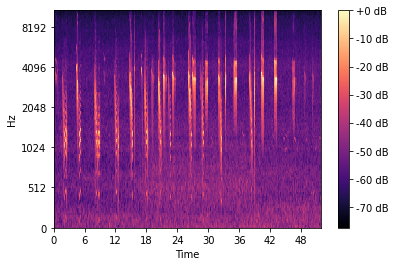

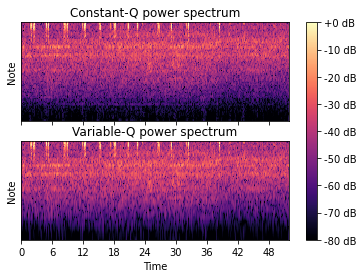

In [24]:
n_mels = 128
S = librosa.feature.melspectrogram(sound_array, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmin=1536.0)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

C = np.abs(librosa.cqt(sound_array, sr=sample_rate))
V = np.abs(librosa.vqt(sound_array, sr=sample_rate))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max), sr=sample_rate, x_axis='time', y_axis='cqt_note', ax=ax[0])
ax[0].set(title='Constant-Q power spectrum', xlabel=None)
ax[0].label_outer()
img = librosa.display.specshow(librosa.amplitude_to_db(V, ref=np.max), sr=sample_rate, x_axis='time', y_axis='cqt_note', ax=ax[1])
ax[1].set_title('Variable-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")